In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re


In [2]:
df = pd.read_csv("./cleaned_main_dataset.csv")
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

In [3]:
remove_all_non_alpha_regex = re.compile("[^a-zA-Z0-9 ]")

In [4]:
df["Product description"] = df["Product description"].apply(
    lambda x: remove_all_non_alpha_regex.sub("", x).lower()
)
df["Lineitem name"] = df["Lineitem name"].apply(
    lambda x: remove_all_non_alpha_regex.sub("", x).lower()
)
df = df[~(df["Product description"] == "")]


In [5]:
len(df)

7504

In [6]:
df.head(5)

,Email,Lineitem name,Lineitem sku,Product description
0,30cf6c31baa03a1c5872cfb2ab85ea1abf124c3b,the victoria bouquet,OBVBUN1410,mini bouquet spesial dari outerbloom terdiri d...
1,ab6fce12a23cb7ffe3c2bf1e8515e52118a3170e,gentle soul jabodetabek,JKTDUK1030,papan bunga untuk ucapan duka cita desain terb...
2,b548ebfc66a66540846b6f73ec6f1290be31c8c4,aia papan bunga condolences l2 005,AIAPPB1024,papan bunga untuk ucapan duka cita desain terb...
3,9091f644260c73912b8c0c37b8d84d5cea0af86d,endearing ruby,OBVSTF1015,rangkaian bunga untuk ucapan congratulations s...
4,b63bd66834f8e9d1e9da1008c8f8725bdb4f0039,sweet bright,OBVBUA1018,parsel buahbuahan premium dari outerbloom terd...


<AxesSubplot: >

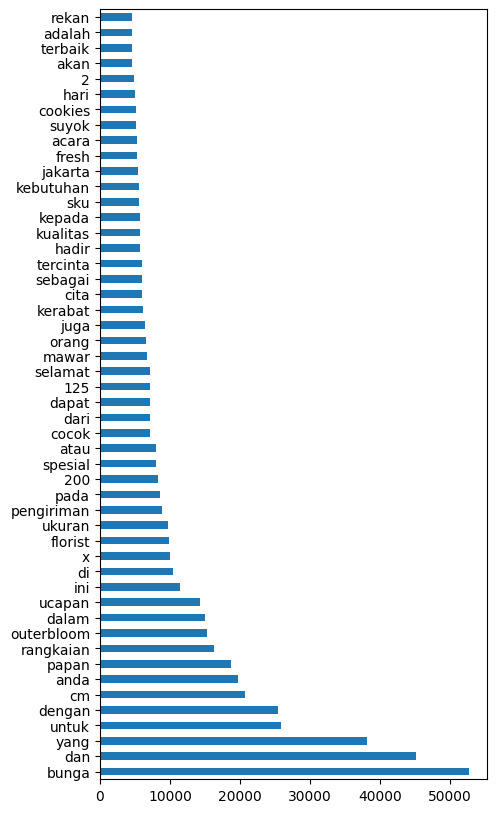

In [7]:
word_freq = df["Product description"].str.split(expand=True).stack().value_counts().sort_values(ascending=False)

word_freq[:50].plot(figsize=(5, 10),kind="barh")

In [8]:
common_words = []


def remove_common_words(description: str):
    tmp_desc = description

    for word in common_words:
        tmp_desc = tmp_desc.replace(word, "")

    return tmp_desc


df["Product description"] = df["Product description"].apply(
    remove_common_words
)

df["Product description"].head(5)


0    mini bouquet spesial dari outerbloom terdiri d...
1    papan bunga untuk ucapan duka cita desain terb...
2    papan bunga untuk ucapan duka cita desain terb...
3    rangkaian bunga untuk ucapan congratulations s...
4    parsel buahbuahan premium dari outerbloom terd...
Name: Product description, dtype: object

In [9]:
len(df)

7504

<AxesSubplot: >

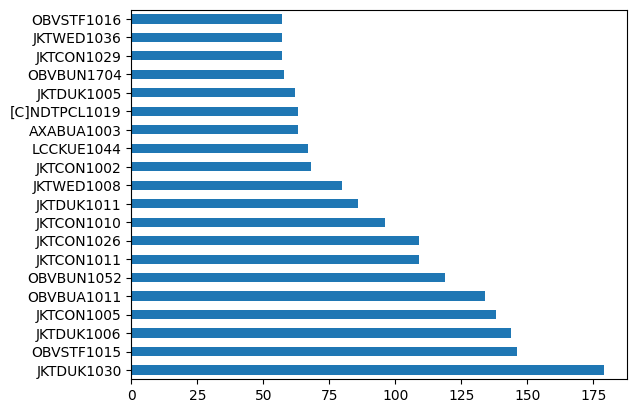

In [10]:
unique_lineitem = df["Lineitem sku"].value_counts()
unique_lineitem[:20].sort_values(ascending=False).plot(kind="barh")


In [11]:
print("Unique product bought:", len(unique_lineitem))
print("% of total products:", (len(unique_lineitem) / 3724) * 100)


Unique product bought: 1240
% of total products: 33.297529538131045


## Main data splitting

Split main dataset to training and test by taking one from each email.

In [12]:
test = df.groupby("Email").sample(1)

test.head(5)

,Email,Lineitem name,Lineitem sku,Product description
1542,005dae28d8d6b51ecc3468cdb4fe470b9d6a9f4b,heartfelt hope jabodetabek,JKTCON1008,papan bunga untuk ucapan selamat desain terbai...
2146,006d40642b04aabe1b61ecae5bc1d438403649b8,charming tulip in vase,OBVBUN1812,buket bunga meja dari outerbloom perpaduan sem...
7716,007504498121b31483adfb3f0110e1b64d925ae5,happy graduation red bouquet,OBVBUN1313,pelengkap momen spesial 12 mawar merah babys b...
7256,009ba59f3159b74d8eed4525f17ca52f92ae5f0c,eternal fidelity jabodetabek,JKTWED1008,papan bunga untuk ucapan selamat menikah desai...
4581,00ae4c165f3141fde869e7dcb1d786b85fd0565b,sincerity solace,OBVSTF1050,rangkaian bunga untuk ucapan duka cita terdiri...


In [13]:
print("Test dataset size:", len(test))


Test dataset size: 1208


In [14]:
training = df[~df.isin(test)].dropna()

training.head(5)

,Email,Lineitem name,Lineitem sku,Product description
1,ab6fce12a23cb7ffe3c2bf1e8515e52118a3170e,gentle soul jabodetabek,JKTDUK1030,papan bunga untuk ucapan duka cita desain terb...
2,b548ebfc66a66540846b6f73ec6f1290be31c8c4,aia papan bunga condolences l2 005,AIAPPB1024,papan bunga untuk ucapan duka cita desain terb...
3,9091f644260c73912b8c0c37b8d84d5cea0af86d,endearing ruby,OBVSTF1015,rangkaian bunga untuk ucapan congratulations s...
5,8efa05e583b605d04ca0dfa32422ae00967c9b0b,outerbloom jasmine breeze diffuser 50 ml,OBIDIF1001,reed diffuser aroma jasmine dapat bertahan sek...
7,8efa05e583b605d04ca0dfa32422ae00967c9b0b,rose empress in vase,OBVBUN1765,buket bunga meja spesial terdiri dari mawar me...


In [15]:
print("Training dataset size:", len(training))

Training dataset size: 6296


In [16]:
from itertools import permutations

In [18]:
grouped_training = training.groupby("Email")

training_dataset_permutated = []

for key,group in grouped_training:
    for b,g in permutations(group['Product description'].tolist(),2):
        training_dataset_permutated.append([key,b,g])

final_training_dataset = pd.DataFrame(training_dataset_permutated,columns=['Email','Description 1','Description 2'])

In [19]:
final_training_dataset.head(5)

,Email,Description 1,Description 2
0,005dae28d8d6b51ecc3468cdb4fe470b9d6a9f4b,papan bunga untuk ucapan selamat desain terbai...,papan bunga untuk ucapan duka cita desain terb...
1,005dae28d8d6b51ecc3468cdb4fe470b9d6a9f4b,papan bunga untuk ucapan selamat desain terbai...,papan bunga untuk ucapan selamat desain terbai...
2,005dae28d8d6b51ecc3468cdb4fe470b9d6a9f4b,papan bunga untuk ucapan selamat desain terbai...,terdiri dari bunga mawar putih dan bunga lily ...
3,005dae28d8d6b51ecc3468cdb4fe470b9d6a9f4b,papan bunga untuk ucapan selamat desain terbai...,papan bunga untuk ucapan selamat menikah desai...
4,005dae28d8d6b51ecc3468cdb4fe470b9d6a9f4b,papan bunga untuk ucapan duka cita desain terb...,papan bunga untuk ucapan selamat desain terbai...
